# Homework #1
Josh Cohen

## Imports

In [10]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import sympy as sym
from IPython.display import Image

## Problem 3.1

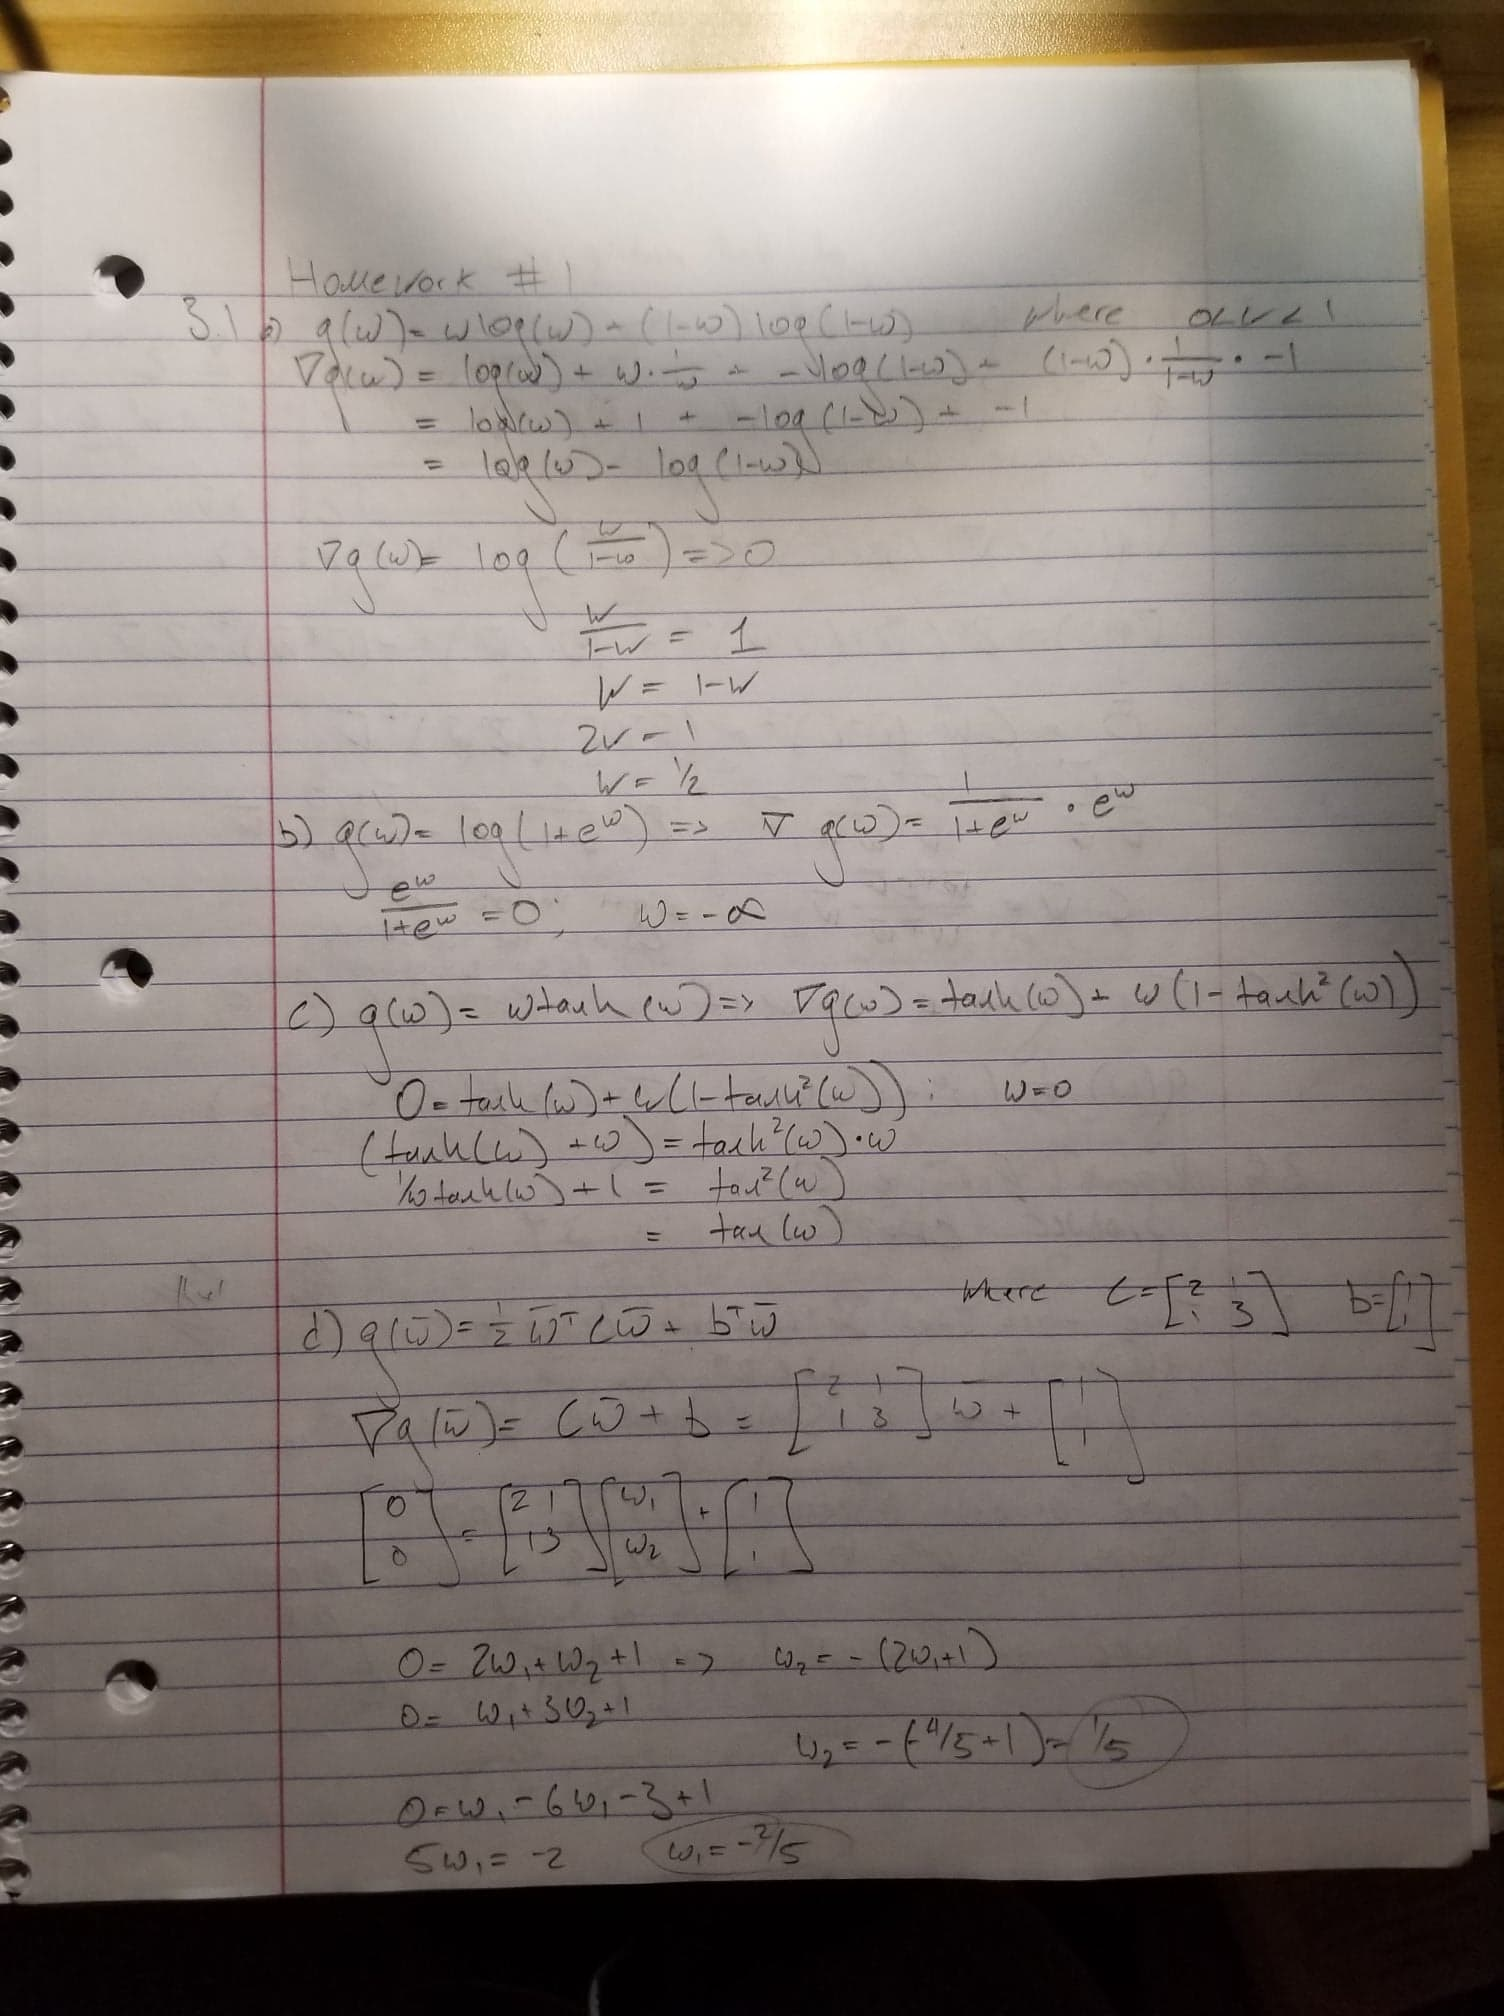

In [24]:
Image("p31.jpg")

<IPython.core.display.Javascript object>


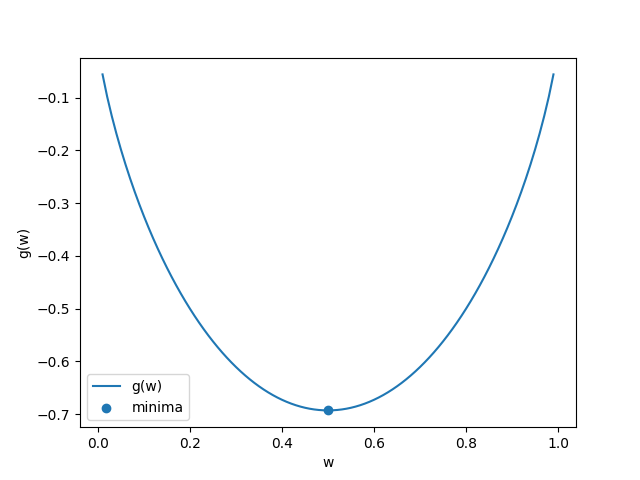

In [5]:
#3.1 a)
w = sym.symbols('w')
eq_a = w * sym.ln(w) + (1- w) * sym.log(1-w)
eq_a_lam = sym.lambdify(w, eq_a)
input_vec = np.arange(0.01,1,.01)
output_vec = eq_a_lam(input_vec)
plt.figure()
plt.plot(input_vec, output_vec)
plt.scatter(0.5, eq_a_lam(0.5))
plt.ylabel("g(w)")
plt.xlabel("w")
plt.legend(["g(w)", "minima"])
plt.show()

<IPython.core.display.Javascript object>


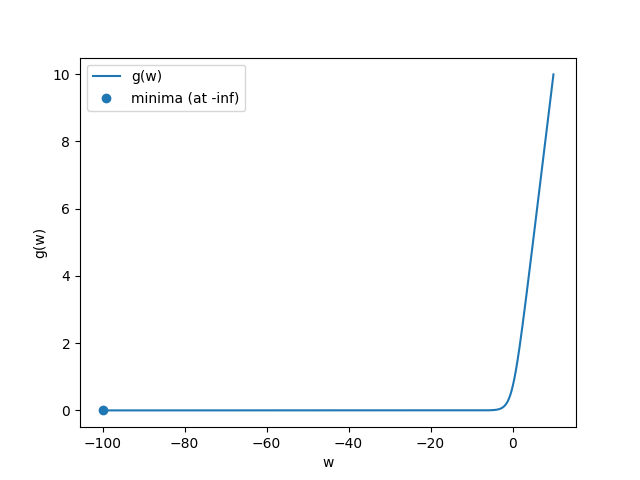

In [7]:
#3.1 b)
w = sym.symbols('w')
eq_b = sym.ln(1 + sym.exp(w))
eq_b_lam = sym.lambdify(w, eq_b)
input_vec = np.arange(-100,10,.01)
output_vec = eq_b_lam(input_vec)
plt.figure()
plt.plot(input_vec, output_vec)
plt.scatter(-100, eq_b_lam(-100))
plt.ylabel("g(w)")
plt.xlabel("w")
plt.legend(["g(w)", "minima (at -inf)"])
plt.show()

<IPython.core.display.Javascript object>


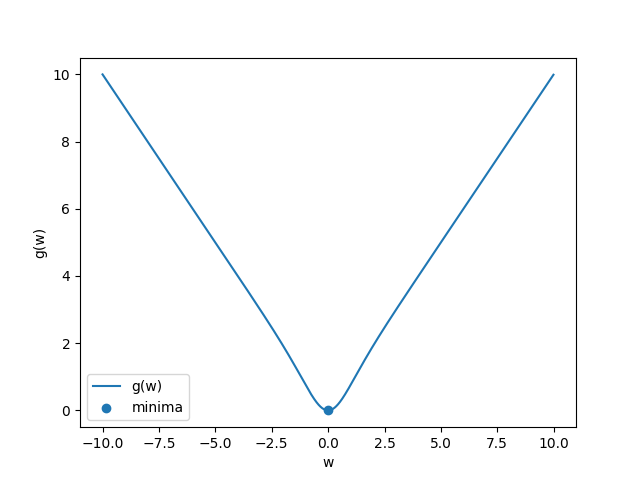

In [8]:
#3.1 c)
w = sym.symbols('w')
eq_c = w * sym.tanh(w)
eq_c_lam = sym.lambdify(w, eq_c)
input_vec = np.arange(-10,10,.01)
output_vec = eq_c_lam(input_vec)
plt.figure()
plt.plot(input_vec, output_vec)
plt.scatter(0, eq_c_lam(0))
plt.ylabel("g(w)")
plt.xlabel("w")
plt.legend(["g(w)", "minima"])
plt.show()

<IPython.core.display.Javascript object>


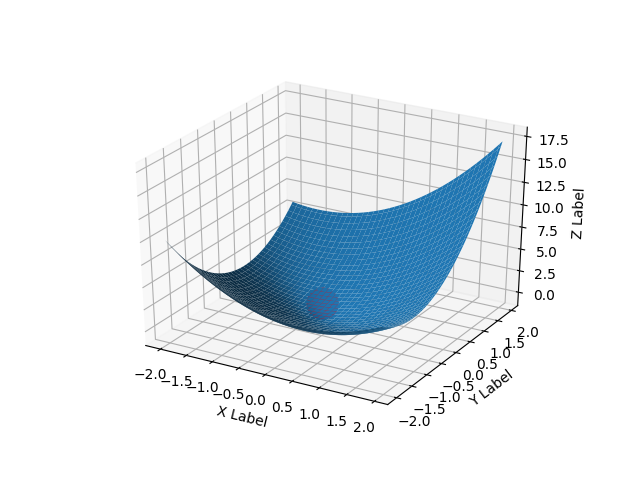

In [13]:
#3.1 d)
w_1, w_2 = sym.symbols('w_1, w_2')
w = sym.Matrix([w_1, w_2])
C = sym.Matrix([[2,1],[1,3]])
b = sym.Matrix([1,1])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

eq_d = sym.Rational(1,2) * w.T * C * w + b.T * w
eq_d_lam = sym.lambdify([w_1,w_2], eq_d)
w_1_inp = w_2_inp = np.arange(-2,2,.05)
X, Y = np.meshgrid(w_1_inp, w_2_inp)
zs = np.array(eq_d_lam(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
surface = ax.plot_surface(X, Y, Z)
#serves to mark the minima!
scatter = ax.scatter(-.4, .2, eq_d_lam(-.4, .2), c='r', s = 500)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


## Problem 3.3

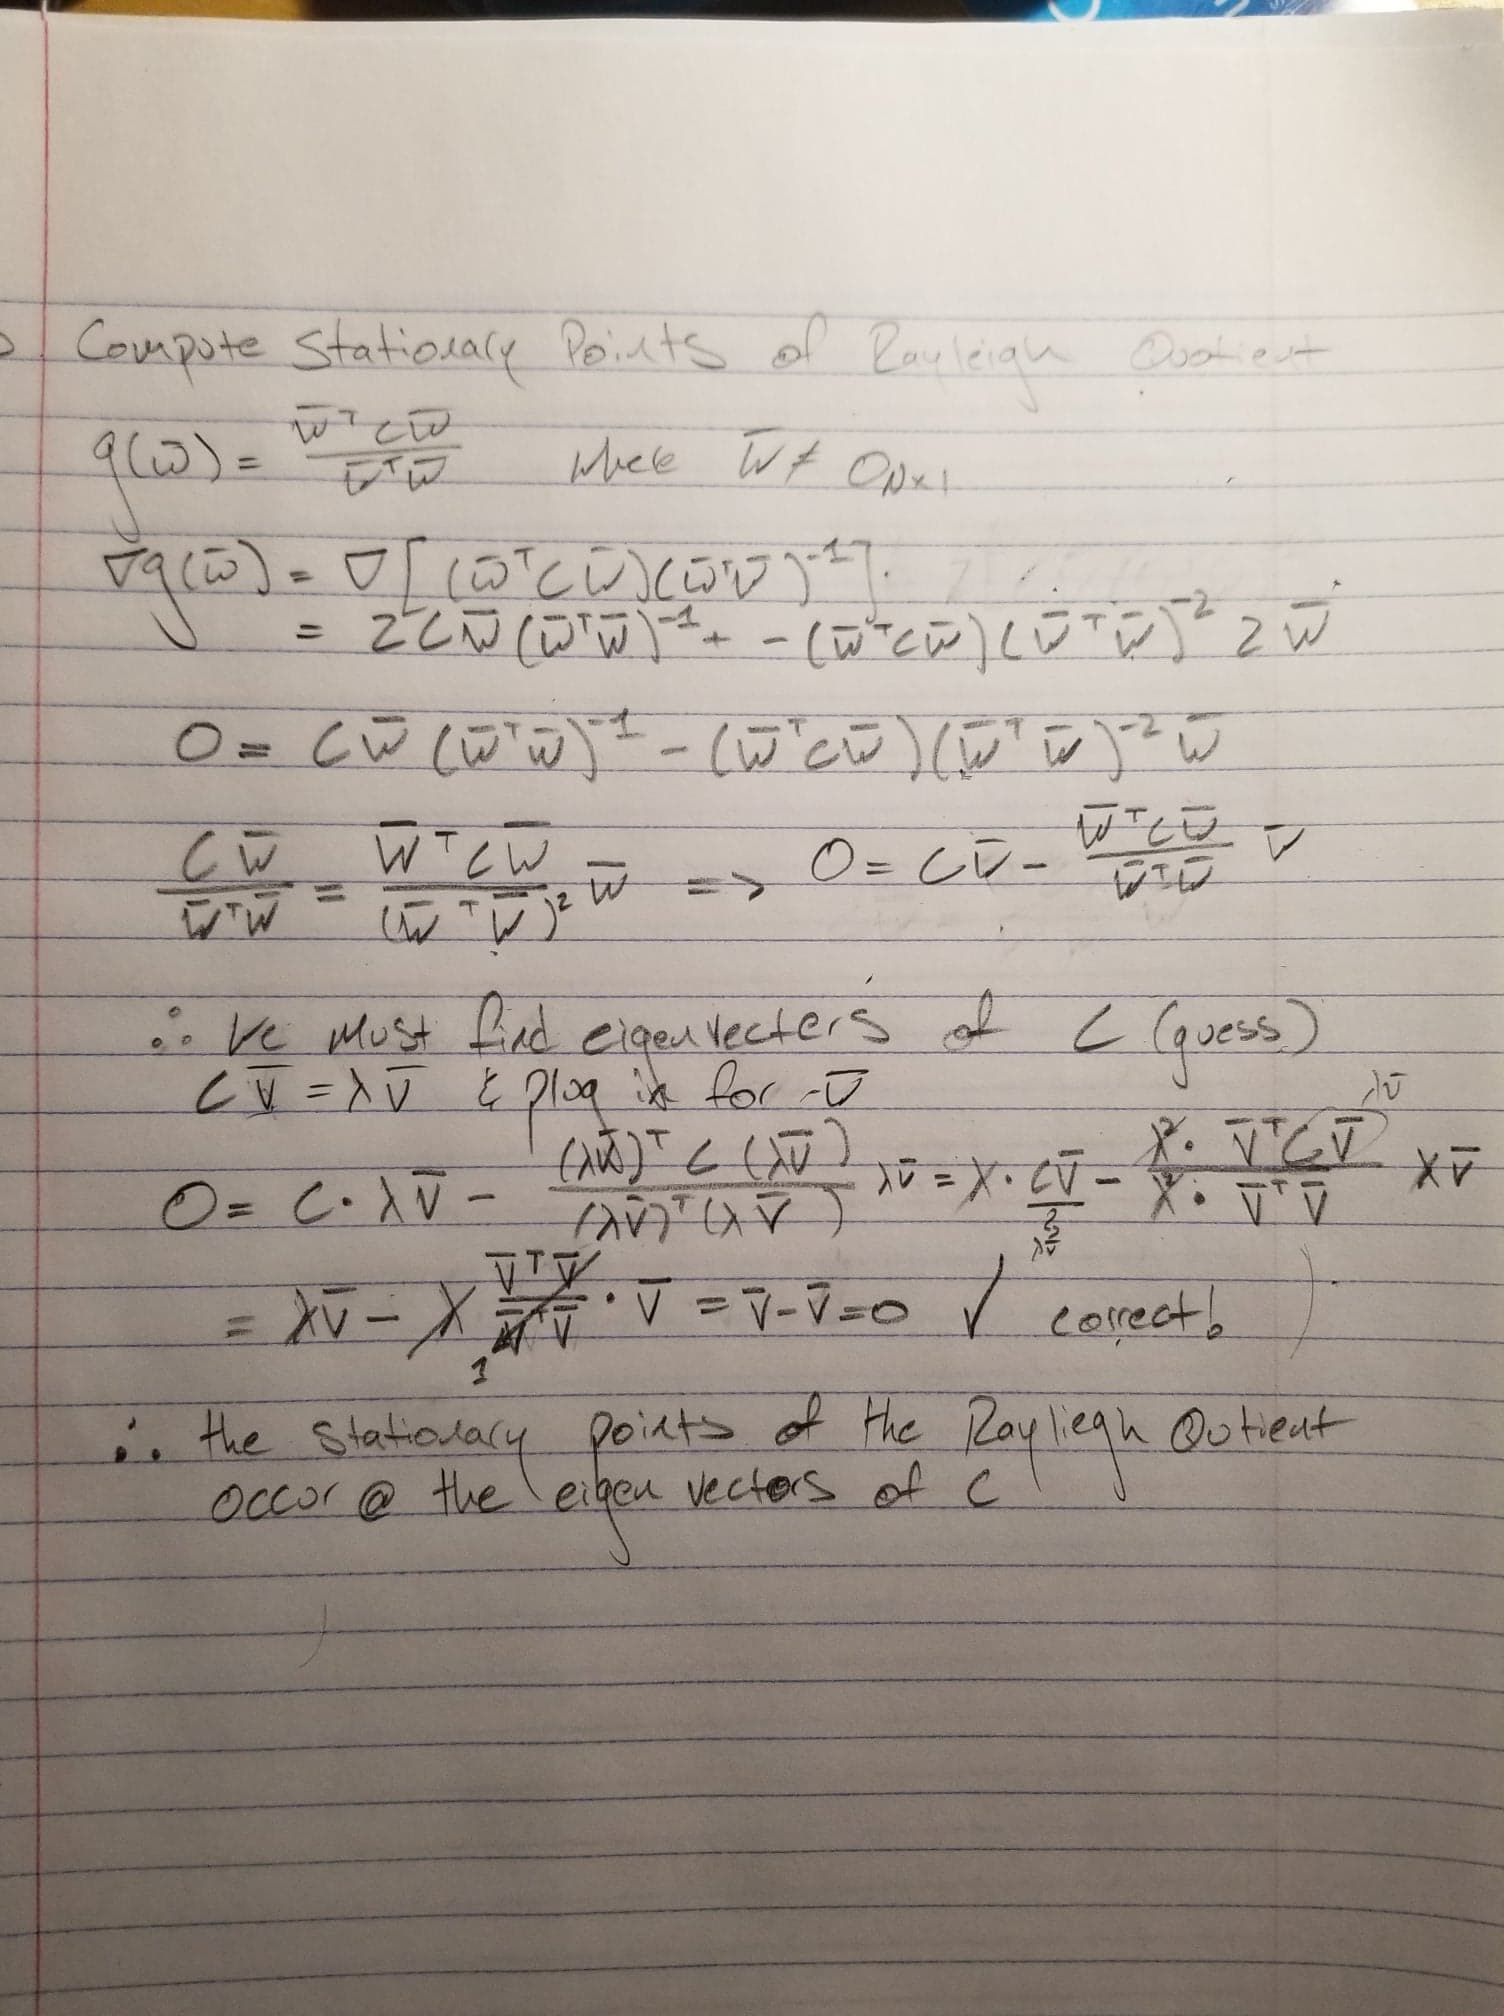

In [14]:
Image("3_3.jpg")

## Problem 3.5

In [95]:
###
# Problem 3.5
###
#Note: problem says to implement functions with numpy, I will implement them symbollically
#        with sympy then use lambdify to get a lambda function that produces numpy arrays
import numpy as np
import sympy as sym
#define symbol and symbollic equations
w = sym.symbols('w')
g = sym.Rational(1,50) * (w**4 + w**2 + 10 * w)
grad_g = sym.Rational(1,25) * (2 * w**3 + w + 5)#obtained by hand calc
#obtain lambda functions from symbolic equations
lam_g = sym.lambdify(w, g)
lam_grad_g = sym.lambdify(w, grad_g)
#define init condition and alpha sizes
w_naught = 2
alpha_vals = [1, 10**-1, 10**-2]

#define our cost function
epsilon = 10**-10
#returns true if stationary point reached
def cost(grad_g):
    return (grad_g < epsilon)

        

In [112]:
#define function that we will use for gradient descent
def grad_desc(g, grad_g, w_last, alpha):
    num_its = 1000
    cost_vals = np.zeros(num_its)
    grad_g_last = grad_g(w_last) 
    cost_vals[0] = g(w_last)
    for x in range(1, num_its):
        w_next = w_last - alpha * grad_g(w_last)
        cost_vals[x] = g(w_next)
        w_last = w_next
    return cost_vals

x_vals = np.arange(1000)

<IPython.core.display.Javascript object>


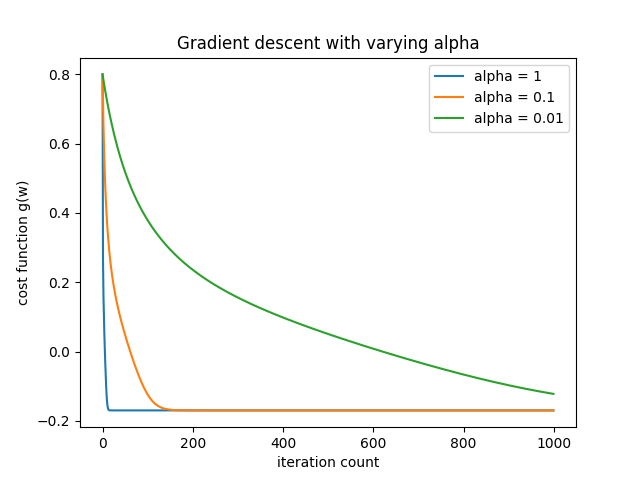

In [129]:
plt.figure()
strings = []
for alph in alpha_vals:
    cost_vals = grad_desc(lam_g, lam_grad_g, w_naught, alph)
    plt.plot(x_vals, cost_vals)
    strings.append("alpha = {}".format(alph))
plt.xlabel("iteration count")
plt.ylabel("cost function g(w)")
plt.title("Gradient descent with varying alpha")
plt.legend(strings)
plt.show()

## Probelm 3.6

In [15]:
import sympy as sym
import numpy as np
w = sym.symbols('w')
g = sym.lambdify(w, sym.Abs(w))
num_its = 20
w_naught = 1.75  
alpha_fixed = 0.5
#define piecewise gradient function grad_g
grad_g = sym.lambdify(w, sym.Piecewise((1, w > 0), (-1, w <0)))

In [16]:
#define function that we will use for fixed alpha gradient descent
def grad_desc(g, grad_g, w_last, alpha):
    num_its = 20
    cost_vals = np.zeros(num_its)
    grad_g_last = grad_g(w_last) 
    cost_vals[0] = g(w_last)
    for x in range(1, num_its):
        w_next = w_last - alpha * grad_g(w_last)
        cost_vals[x] = g(w_next)
        w_last = w_next
    return cost_vals

In [17]:
#define function that we will use for scaled alpha gradient descent
def grad_desc_scale_alpha(g, grad_g, w_last, num_its):
    alpha = 1/1
    cost_vals = np.zeros(num_its)
    grad_g_last = grad_g(w_last) 
    cost_vals[0] = g(w_last)
    for x in range(1, num_its):
        w_next = w_last - alpha * grad_g(w_last)
        alpha = 1/(x+1)
        cost_vals[x] = g(w_next)
        w_last = w_next
    return cost_vals

In [18]:
cost_fixed_alph = grad_desc(g, grad_g, w_naught, alpha_fixed)
cost_scaled_alph = grad_desc_scale_alpha(g, grad_g, w_naught, 20)

<IPython.core.display.Javascript object>


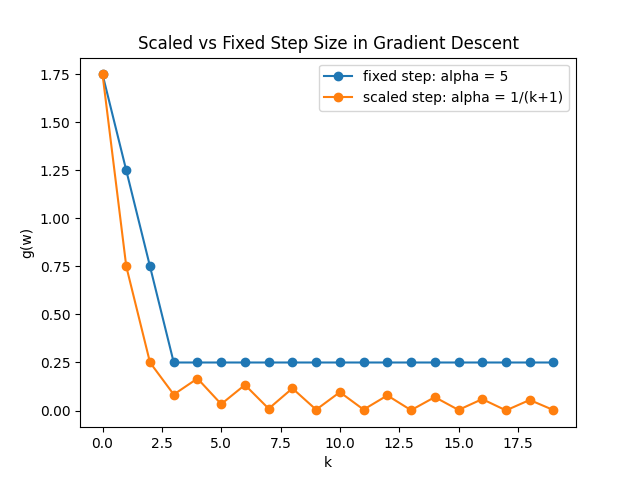

In [19]:
plt.figure()
x_vals = np.arange(20)
plt.plot(x_vals,cost_fixed_alph, '-o')
plt.plot(x_vals,cost_scaled_alph, '-o')
plt.ylabel('g(w)')
plt.xlabel('k')
plt.title("Scaled vs Fixed Step Size in Gradient Descent")
plt.legend(["fixed step: alpha = 5", "scaled step: alpha = 1/(k+1)"])
plt.show()

## Probelm 3.8

In [20]:
w = sym.MatrixSymbol('w', 10, 1)
g = w.T * w
grad_g = g.diff(w)

g_lam = sym.lambdify([w], g)
grad_g_lam = sym.lambdify([w], grad_g)

In [21]:
#init
w_naught = np.zeros(10) + 1.0
alpha_vals = [0.001, 0.1, 1]

In [22]:
#define function that we will use for fixed alpha gradient descent
def grad_desc(g, grad_g, w_last, alpha):
    num_its = 20
    cost_vals = np.zeros(num_its)
    grad_g_last = grad_g(w_last) 
    cost_vals[0] = g(w_last)
    for x in range(1, num_its):
        w_next = w_last - alpha * grad_g(w_last)
        cost_vals[x] = g(w_next)
        w_last = w_next
    return cost_vals

<IPython.core.display.Javascript object>


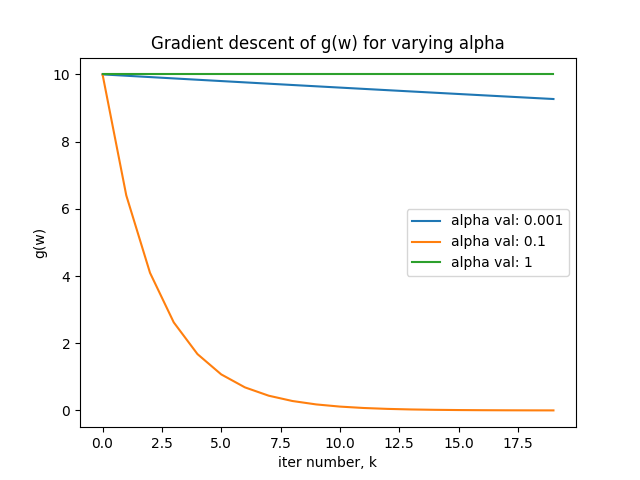

In [23]:
plt.figure()
x_vals = np.arange(20);
strings = []
for alph in alpha_vals:
    strings.append("alpha val: {}".format(alph))
    cost_vals = grad_desc(g_lam, grad_g_lam, w_naught, alph)
    plt.plot(x_vals, cost_vals)
plt.legend(strings)
plt.xlabel("iter number, k")
plt.ylabel("g(w)")
plt.title("Gradient descent of g(w) for varying alpha")
plt.show()